Proponga una arquitectura basada en capas densas para clasificar los dígitos de\
la base de datos MNIST. Ahora implementar una arquitectura que utilice capas\
convolucionales y compare los resultados. Graficar la precisión sobre los datos\
de entrenamiento y los de prueba para cada época de ambas arquitecturas. A\
partir de los gráficos de exactitud y error, analizar pros y cons de las\
distintas redes neuronales. Explicar a qué se deben las diferencias del\
rendimiento entre ambas arquitecturas. A su vez, explique para qué se utiliza la\
capa Dropout. ¿Describa la diferencia de utilizar una red con capas densas y\
otra con capas convolucionales, porque es mejor usar una u otra? ¿Qué\
diferencia hay en la cantidad de parámetros de estas dos arquitecturas?

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype(float)/255
x_test = x_test.astype(float)/255

x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [3]:
def plot(hist):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(11,4))
    ax1.plot(hist.history['loss'], label='CCE')
    ax1.plot(hist.history['val_loss'], label='val_CCE')
    ax1.set_xlabel('Epocas', fontsize=15)
    ax1.set_ylabel('Loss', fontsize=15)
    ax1.legend(loc='best')

    ax2.plot(hist.history['sparse_categorical_accuracy'], label='acc')
    ax2.plot(hist.history['val_sparse_categorical_accuracy'], label='val_acc')
    ax2.set_xlabel('Epocas', fontsize=15)
    ax2.set_ylabel('Accuracy', fontsize=15)
    ax2.legend(loc='best')

    fig.tight_layout()
    plt.show()
    return None

Red de capas densas

In [ ]:
keras.backend.clear_session()

reg = keras.regularizers.L2(l2=1e-4)

input = keras.layers.Input(shape=(28,28))
flat = keras.layers.Flatten()(input)

l1 = keras.layers.Dense(256, activation='relu', kernel_regularizer=reg)(flat)
drop1 = keras.layers.Dropout(rate=.2)(l1)

l2 = keras.layers.Dense(128, activation='relu', kernel_regularizer=reg)(drop1)
drop2 = keras.layers.Dropout(rate=.2)(l2)

l3 = keras.layers.Dense(10, activation='relu', kernel_regularizer=reg)(drop2)

output = keras.layers.Dense(784, activation='sigmoid', kernel_regularizer=reg)(l3)

model = keras.models.Model(inputs=input, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290  

In [ ]:
opt = keras.optimizers.Adam(learning_rate=.0005)

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                 epochs=50, batch_size=128, verbose=2)


Epoch 1/50
469/469 - 7s - loss: 1.2441 - sparse_categorical_accuracy: 0.7355 - val_loss: 0.3573 - val_sparse_categorical_accuracy: 0.9146 - 7s/epoch - 16ms/step
Epoch 2/50
469/469 - 6s - loss: 0.3635 - sparse_categorical_accuracy: 0.9130 - val_loss: 0.2686 - val_sparse_categorical_accuracy: 0.9382 - 6s/epoch - 12ms/step
Epoch 3/50
469/469 - 6s - loss: 0.2839 - sparse_categorical_accuracy: 0.9363 - val_loss: 0.2260 - val_sparse_categorical_accuracy: 0.9510 - 6s/epoch - 13ms/step
Epoch 4/50
469/469 - 6s - loss: 0.2412 - sparse_categorical_accuracy: 0.9488 - val_loss: 0.1969 - val_sparse_categorical_accuracy: 0.9607 - 6s/epoch - 13ms/step
Epoch 5/50
469/469 - 6s - loss: 0.2129 - sparse_categorical_accuracy: 0.9565 - val_loss: 0.1785 - val_sparse_categorical_accuracy: 0.9644 - 6s/epoch - 14ms/step
Epoch 6/50
469/469 - 6s - loss: 0.1901 - sparse_categorical_accuracy: 0.9631 - val_loss: 0.1629 - val_sparse_categorical_accuracy: 0.9701 - 6s/epoch - 12ms/step
Epoch 7/50
469/469 - 6s - loss: 0.

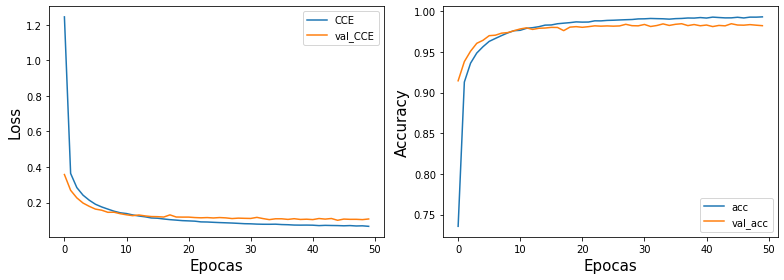

In [ ]:
plot(hist)

Red convolucional

In [23]:
keras.backend.clear_session()

reg = keras.regularizers.L2(l2=1e-4)
drop_r = 0.1

input = keras.layers.Input(shape=(28,28,1))

l1 = keras.layers.Conv2D(32, 5, activation='relu', padding='same')(input)
pool1 = keras.layers.MaxPooling2D()(l1)
drop1 = keras.layers.Dropout(rate=drop_r)(pool1)

l2 = keras.layers.Conv2D(32, 3, activation='relu', padding='same')(drop1)
pool2 = keras.layers.MaxPooling2D()(l2)
drop2 = keras.layers.Dropout(rate=drop_r)(pool2)

l3 = keras.layers.Conv2D(64, 2, activation='relu', padding='same')(drop2)
pool3 = keras.layers.MaxPooling2D()(l3)
drop3 = keras.layers.Dropout(rate=drop_r)(pool3)

flat = keras.layers.Flatten()(drop3)

l4 = keras.layers.Dense(50, activation='relu', kernel_regularizer=reg)(flat)
drop4 = keras.layers.Dropout(rate=drop_r)(l4)

output = keras.layers.Dense(10, activation='sigmoid', kernel_regularizer=reg)(drop4)

model = keras.models.Model(inputs=input, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                         

In [24]:
opt = keras.optimizers.Adam(learning_rate=.001)

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                 epochs=15, batch_size=256, verbose=1)


Epoch 1/15
235/235 [==============================] - 72s 302ms/step - loss: 0.5569 - sparse_categorical_accuracy: 0.8206 - val_loss: 0.0988 - val_sparse_categorical_accuracy: 0.9730
Epoch 2/15
235/235 [==============================] - 70s 300ms/step - loss: 0.1369 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.0696 - val_sparse_categorical_accuracy: 0.9812
Epoch 3/15
235/235 [==============================] - 71s 301ms/step - loss: 0.0988 - sparse_categorical_accuracy: 0.9727 - val_loss: 0.0510 - val_sparse_categorical_accuracy: 0.9861
Epoch 4/15
235/235 [==============================] - 70s 299ms/step - loss: 0.0817 - sparse_categorical_accuracy: 0.9779 - val_loss: 0.0434 - val_sparse_categorical_accuracy: 0.9901
Epoch 5/15
235/235 [==============================] - 70s 299ms/step - loss: 0.0747 - sparse_categorical_accuracy: 0.9803 - val_loss: 0.0420 - val_sparse_categorical_accuracy: 0.9902
Epoch 6/15
235/235 [==============================] - 70s 298ms/step - loss: 0.0662 -

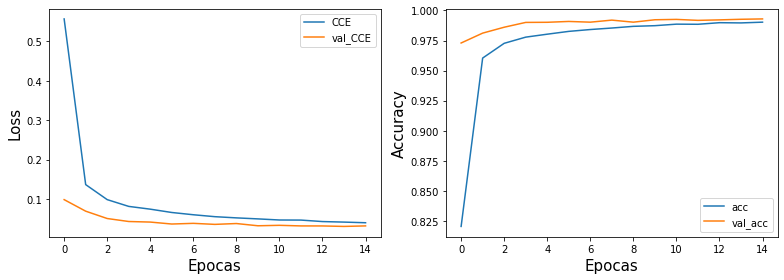

In [25]:
plot(hist)

In [26]:
np.argmax(model.predict(x_test[0:10]), axis=1), y_test[0:10]

(array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8))